In [13]:
using Plots
using LinearAlgebra
# using Revise
using LatticeQM

# Tutorial: Tight-binding operators

## Simple 2D lattice: nearest neighbor example

A simple nearest neighbor Hamiltonian
\begin{align}
    H = t \sum_{\langle i,j \rangle} c^\dagger_i c_j
\end{align}

In [2]:
lat = Geometries2D.honeycomb()

function t(r1, r2=0.0)
    δr=r1.-r2
    
    if 0.9 < norm(δr[1:3])<1.1 # nearest neighbor found!
        return -1.0
    end
    
    return 0.0
end

T = TightBinding.gethops(lat, t)

nothing

### Bloch Hamiltonian $H(\vec{k})$

In [3]:
hk = TightBinding.getbloch(T)
hk([0.1,0.0])

2×2 Matrix{ComplexF64}:
      0.0+0.0im       -2.80902-0.587785im
 -2.80902+0.587785im       0.0+0.0im

### Band structure

In [4]:
ks = kpath(lat; num_points=200)
bands = getbands(T, ks)

Computing bands... 100%|████████████████████████████████| Time: 0:00:02


Number of bands:      2
Number of k-points:   200
No observables.
Discrete Path: $\Gamma$→$K$→$M$→$K'$→$\Gamma$→$M$  (200 points)


In [5]:
plot(bands; size=(300,200))

### Shorter version with pre-defined operators

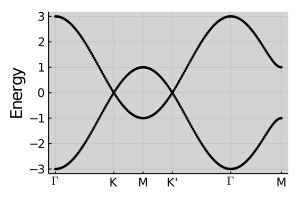

In [6]:
T = Hops() # empty hops
Operators.nearestneighbor!(T, lat) # fill in nearest neighbors
Operators.addchemicalpotential!(T, lat, r->(r[4]==0) ? 0.25 : -0.25) # sublattice imbalance

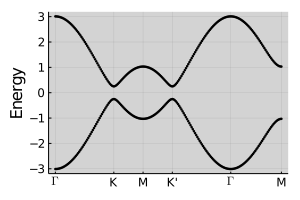

In [7]:
ks = kpath(lat; num_points=200)
bands = getbands(T, ks)

plot(bands; size=(300,200))

Calculating expectation values:

In [8]:
T = Hops() # empty hops
Operators.nearestneighbor!(T, lat) # fill in nearest neighbors
Operators.addsublatticeimbalance!(T,lat, 0.5) # shortcut for sublattice imbalance

T = TightBinding.addspin(T, :spinhalf)
Operators.addzeeman!(T, lat, 0.2)

# Additional operators
sz = Operators.spin(lat, "sz")
valley = Operators.valley(lat; spinhalf=true)

nothing

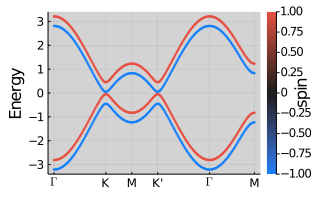

In [9]:
ks = kpath(lat; num_points=200)
bands = getbands(T, ks, [sz, valley])

plot(bands; size=(320,200), colorbar=true, colorbar_title="spin")

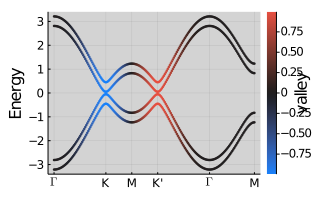

In [10]:
plot(bands, 2; size=(320,200), colorbar=true, colorbar_title="valley")

## Ribbons

### Armchair

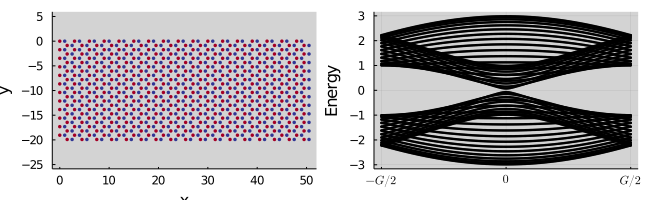

In [11]:
N = 12
lat = Structure.reduceto1D(Geometries2D.honeycomb(), [[1, 1] [N, -N]])
p1 = plot(lat, "sublattice"; supercell=[16], markersize=2)

hops = Operators.graphene(lat)

ks = kpath(lat; num_points=200)
bands = getbands(hops, ks)

p2 = plot(bands; size=(320,200), colorbar=true)

plot(p1,p2, size=(650,200))

### Zigzag 

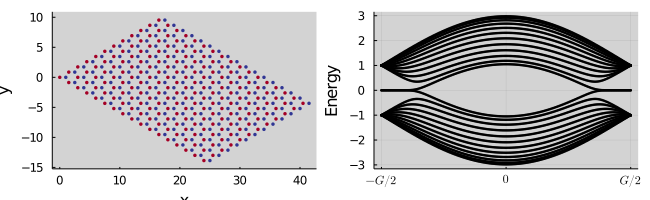

In [12]:
N = 12
lat = Structure.reduceto1D(Geometries2D.honeycomb(), [[1, 0] [0, N]])
p1 = plot(lat, "sublattice"; supercell=[16], markersize=2)

hops = Operators.graphene(lat)

ks = kpath(lat; num_points=200)
bands = getbands(hops, ks)

p2 = plot(bands; size=(320,200), colorbar=true)

plot(p1,p2, size=(650,200))